In [10]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils as im

In [11]:
def plot(img, color_map=cv.COLOR_BGR2RGB, axis=False, **kwargs):
    if not axis:
        plt.axis('off')
    plt.imshow(img if color_map is None else cv.cvtColor(img, color_map), **kwargs)
    plt.show()

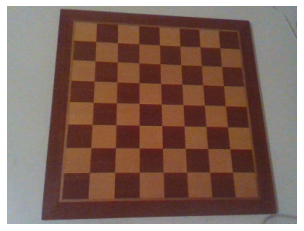

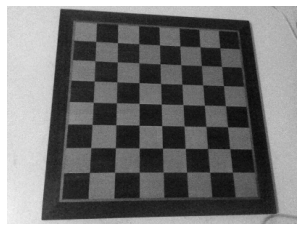

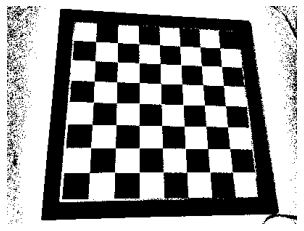

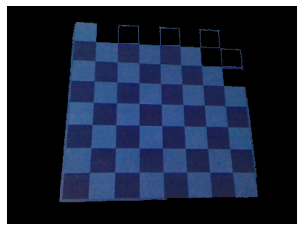

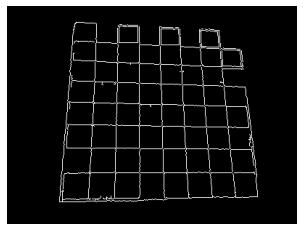

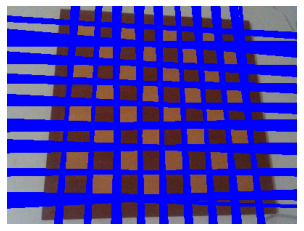

In [69]:
img = cv.imread('img/2021-12-05-022131.jpg')

img = im.resize(img, width=400, height=400)
plot(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plot(gray, None, cmap='gray')

adaptiveThresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 125, 1)
plot(adaptiveThresh, None, cmap='gray')


contours, hierarchy = cv.findContours(adaptiveThresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
imgContours = img.copy()
for c in range(len(contours)):
    area = cv.contourArea(contours[c])
    perimeter = cv.arcLength(contours[c], True)
    if c == 0:
        Lratio = 0
    if perimeter > 0:
        ratio = area / perimeter
        if ratio > Lratio:
            largest = contours[c]
            Lratio = ratio
            Lperimeter = perimeter
            Larea = area
    else:
        pass

cv.drawContours(imgContours, [largest], -1, (0, 0, 0), 1)

epsilon = 0.05 * Lperimeter
epsilon = 0
chessboardEdge = cv.approxPolyDP(largest, epsilon, True)
mask = np.zeros((img.shape[0], img.shape[1]), 'uint8') * 125

cv.fillConvexPoly(mask, chessboardEdge, 255, 1)
extracted = np.zeros_like(img)
extracted[mask == 255] = img[mask == 255]
extracted[np.where((extracted == [125, 125, 125]).all(axis=2))] = [0, 0, 20]
plot(extracted, None, cmap='gray')


# edges = cv.Canny(extracted, 50, 200, None, 3)
edges = cv.Canny(extracted, 70, 200)
colorEdges = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
plot(edges, None, cmap='gray')

# lines = cv.HoughLinesP(edges, 1, np.pi / 180, 100, np.array([]), 100, 100)
lines = cv.HoughLines(edges, 1, np.pi / 180, 50, np.array([]), 0, 0)

a, b, c = lines.shape

for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000*(a)))
    cv.line(img, pt1, pt2, (255, 0, 0), 3)

plot(img)